In [6]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import gym
import numpy as np
import matplotlib.pyplot as plt
from env import Connect4env
import torch
import torch.nn as nn
import sys
from agents import DQN_CNN_agent
env=Connect4env()
l,s=env.reset()

agent=DQN_CNN_agent(env,batch_size=128)

In [7]:
def train_agents_dqn(env:Connect4env,agent:DQN_CNN_agent,max_episodes:int):

    full_rewards={1:[0],2:[0]}
    for ep in range(max_episodes):

        agent.reset()
        
        state,legal_moves=env.reset()
        winner=-1

        while winner==-1:
            if legal_moves ==[]:
                break
            player=env.current_player
            action = agent.select_action(state, legal_moves)  # Agent take an action based on the model
            next_state, rewards, legal_moves, winner = env.step(action) 
            

            reward=rewards[player]

            agent.step(state,action,reward,next_state,winner)

            state=next_state

        for p in [1, 2]:
            full_rewards[p].append(full_rewards[p][-1] + rewards[p])

        if ep % 100 == 0:
            print("\rEpisode {}/{}.".format(ep, max_episodes), end="")
            sys.stdout.flush()
        
    return full_rewards
        

In [8]:
full_r=train_agents_dqn(env,agent,1000)

Episode 900/1000.

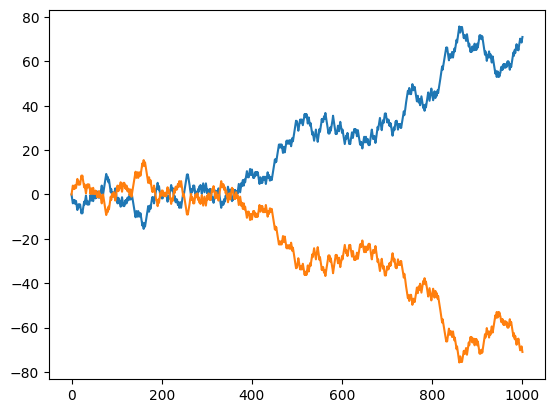

In [9]:
plt.plot(full_r[1])
plt.plot(full_r[2])